In [152]:
import os
from scipy.io import loadmat
from pathlib import Path

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
# the following import is required for matplotlib < 3.2:
from mpl_toolkits.mplot3d import Axes3D  # noqa
from scipy import stats
import mne
import funcs4eeg as fe
import re
import imp
import ast
imp.reload(fe)

<module 'funcs4eeg' from 'c:\\Users\\Tianyi Zheng\\OneDrive - neuron.t.u-tokyo.ac.jp\\Documents\\zheng\\mywork\\attention_tES\\tes-attention\\processing\\eeg_analysis\\funcs4eeg.py'>

In [153]:
real_to_pick = [1, 3, 5, 9, 18]	
sham_to_pick = [6, 10, 11, 15, 16]
bands = [[8, 12], [12.5, 30], [30, 80]]
band_names = ['alpha', 'beta', 'gamma']

band_power = pd.DataFrame(columns=['band name', 'f low', 'f high', 'sham before', 
                                      'sham after', 'sham increase', 'real before', 'real after', 'real increase'])
band_power['band name'] = band_names
band_power['f low'] = [band[0] for band in bands]
band_power['f high'] = [band[1] for band in bands]

In [154]:
case='3 | 4'
watch='11 stim'
tmin = -0.5
tmax = 0

for band_name in band_names:
    fmin = band_power[band_power['band name'] == band_name]['f low'].values[0]
    fmax = band_power[band_power['band name'] == band_name]['f high'].values[0]

    real_before = list()
    real_after = list()
    real_increase = list()
    for subject_id in real_to_pick:
        power_before, power_after = fe.pipeline_band_power(subject_id=subject_id, case=case, watch=watch, fmin=fmin, fmax=fmax, tmin=tmin, tmax=tmax)
        real_before.append(power_before)
        real_after.append(power_after)
        real_increase.append(power_after - power_before)
    band_power.loc[band_power['band name'] == band_name, 'real before'] = str(real_before)
    band_power.loc[band_power['band name'] == band_name, 'real after'] = str(real_after)
    band_power.loc[band_power['band name'] == band_name, 'real increase'] = str(real_increase)


    sham_before = list()
    sham_after = list()
    sham_increase = list()
    for subject_id in sham_to_pick:
        power_before, power_after = fe.pipeline_band_power(subject_id=subject_id, case=case, watch=watch, fmin=fmin, fmax=fmax, tmin=tmin, tmax=tmax)
        sham_before.append(power_before)
        sham_after.append(power_after)
        sham_increase.append(power_after - power_before)
    band_power.loc[band_power['band name'] == band_name, 'sham before'] = str(sham_before)
    band_power.loc[band_power['band name'] == band_name, 'sham after'] = str(sham_after)
    band_power.loc[band_power['band name'] == band_name, 'sham increase'] = str(sham_increase)


c:\Users\Tianyi Zheng\OneDrive - neuron.t.u-tokyo.ac.jp\Documents\zheng\mywork\attention_tES\tes-attention\processing\eeg_analysis\funcs4eeg.py:17: RuntimeWarning: This filename (..\..\..\data\1\repaired_before.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  eeg_before = mne.io.read_raw_fif(eeg_path_before, preload=True, verbose=False)
c:\Users\Tianyi Zheng\OneDrive - neuron.t.u-tokyo.ac.jp\Documents\zheng\mywork\attention_tES\tes-attention\processing\eeg_analysis\funcs4eeg.py:18: RuntimeWarning: This filename (..\..\..\data\1\repaired_after.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  eeg_after = mne.io.read_raw_fif(

In [155]:
display(band_power)

,band name,f low,f high,sham before,sham after,sham increase,real before,real after,real increase
0,alpha,8.0,12,"[1.0329780216115498e-09, 7.58061304306985e-09,...","[1.5531158690661628e-09, 5.8829763260634085e-0...","[5.20137847454613e-10, -1.697636717006441e-09,...","[2.1808086008040378e-09, 3.865835390071681e-09...","[1.3322820738593094e-09, 3.7120820498494177e-0...","[-8.485265269447284e-10, -1.5375334022226364e-..."
1,beta,12.5,30,"[3.4727642075433007e-09, 8.043141691064312e-09...","[3.687220729312429e-09, 6.193981330134212e-09,...","[2.144565217691283e-10, -1.8491603609301003e-0...","[3.484815601820629e-09, 5.466782478446508e-09,...","[2.0990159136111147e-09, 4.99025747716891e-09,...","[-1.3857996882095142e-09, -4.765250012775985e-..."
2,gamma,30.0,80,"[4.188902663476301e-09, 2.3648591743584455e-09...","[2.9183671316742263e-09, 1.5962910858207808e-0...","[-1.2705355318020744e-09, -7.685680885376648e-...","[2.4030415996787343e-09, 3.3823477363280694e-0...","[1.3148428773303085e-09, 2.711391584909619e-09...","[-1.0881987223484258e-09, -6.709561514184505e-..."


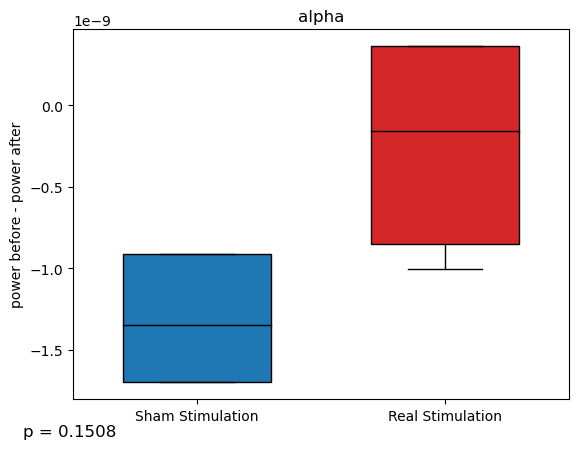

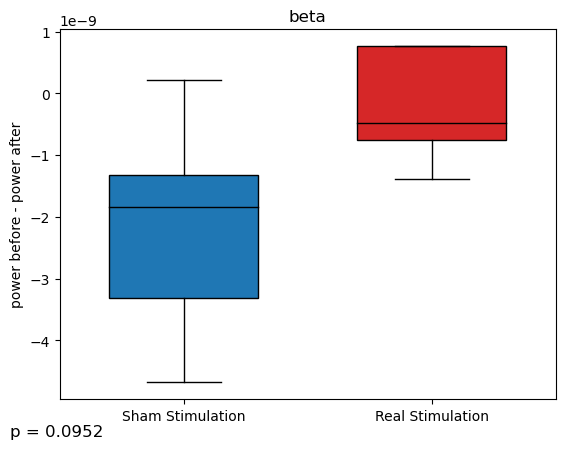

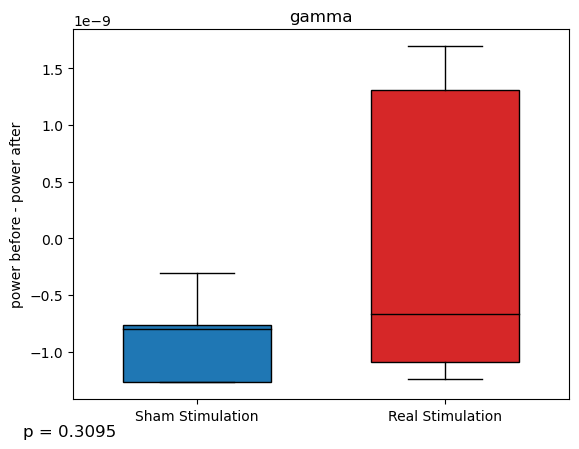

In [157]:
compare_objects = ['alpha', 'beta', 'gamma']
for compare_object in compare_objects:
    save_path = os.path.join('..', '..', '..', 'docs', 'report', 'figs', case+"_"+watch+"_"+compare_object+'.png')

    diff_sham = np.array(band_power.loc[band_power['band name'] == compare_object, 'sham increase'].apply(ast.literal_eval).values[0])
    diff_real = np.array(band_power.loc[band_power['band name'] == compare_object, 'real increase'].apply(ast.literal_eval).values[0])
    
    # create boxplot
    # Create a box plot with whiskers
    fig, ax = plt.subplots()
    boxplots = ax.boxplot([diff_sham, diff_real], patch_artist=True, widths=0.6, showfliers=False)

    # Set colors for the box plots
    colors = ['#1f77b4', '#d62728']
    for patch, color in zip(boxplots['boxes'], colors):
        patch.set_facecolor(color)

    # Set median line color to black
    for median in boxplots['medians']:
        median.set_color('black')

    plt.xticks([1, 2], ['Sham Stimulation', 'Real Stimulation'])
    plt.ylabel('power before - power after')
    plt.title(compare_object)

    # Perform the Mann-Whitney U test
    U, p_value = stats.mannwhitneyu(diff_sham, diff_real)

    # Add the p-value to the plot
    ax.annotate(f'p = {p_value:.4f}',
                xy=(-0.1, -0.1),
                xycoords=('axes fraction', 'axes fraction'),
                ha='left', fontsize=12)
    # plt.savefig(save_path, format='png')

    plt.show()